<a href="https://colab.research.google.com/github/EstevahnAguilera/Data-Science-Projects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description
For this project, you'll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

The dataset we've provided for you has been modified from the original. We've reduced the size of the dataset so that your calculations run faster and we've introduced missing and duplicate values. We were also careful to preserve the distributions of the original data when we made our changes.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. After answering each question, write a brief explanation of your results in a markdown cell of your Jupyter notebook.

This project will require you to make plots that communicate your results. Make sure that any plots you create have a title, labeled axes, and a legend if necessary; and include plt.show() at the end of each cell with a plot.

## Data Dictionary
There are five tables in the dataset, and you'll need to use all of them to do your data preprocessing and EDA. Below is a data dictionary that lists the columns in each table and describes that data that hold.

- instacart_orders.csv: each row corresponds to one order on the Instacart app
  - 'order_id': ID number that uniquely identifies each order
  - 'user_id': ID number that uniquely identifies each customer account
  - 'order_number': the number of times this customer has placed an order
  - 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
  - 'order_hour_of_day': hour of the day that the order was placed
  - 'days_since_prior_order': number of days since this customer placed their previous order
- products.csv: each row corresponds to a unique product that customers can buy
    - 'product_id': ID number that uniquely identifies each product
    - 'product_name': name of the product
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category
    - 'department_id': ID number that uniquely identifies each grocery department category
- order_products.csv: each row corresponds to one item placed in an order
    - 'order_id': ID number that uniquely identifies each order
    - 'product_id': ID number that uniquely identifies each product
    - 'add_to_cart_order': the sequential order in which each item was placed in the cart
    - 'reordered': 0 if the customer has never ordered this product before, 1 if they have
- aisles.csv
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category
    - 'aisle': name of the aisle
- departments.csv
    - 'department_id': ID number that uniquely identifies each grocery department category
    - 'department': name of the department

## Getting Started
I will begin by setting up the environment.
### Importing Libraries
I need to import the necessary libraries.

In [3]:
# Importing the libraries we'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

# Importing the library for google sheets
from google.colab import files
uploaded_1 = files.upload() # instacart_orders
uploaded_2 = files.upload() # products
uploaded_3 = files.upload() # departments
uploaded_4 = files.upload() # aisles
uploaded_5 = files.upload() # order_products

Saving instacart_orders.csv to instacart_orders.csv


Saving products.csv to products.csv


Saving departments.csv to departments.csv


Saving aisles.csv to aisles.csv


Saving order_products.csv to order_products.csv


In [4]:
# Loading the datasets
# Note: These files use semicolon as the separator instead of a comma
orders          = pd.read_csv('instacart_orders.csv', sep=';')
products        = pd.read_csv('products.csv', sep=';')
departments     = pd.read_csv('departments.csv', sep=';')
aisles          = pd.read_csv('aisles.csv', sep=';')
order_products  = pd.read_csv('order_products.csv', sep=';')

## Analyzing the data
Displaying the datasets by using .info() and .head() to gain insights on their structure and content.

In [5]:
# Creating a function that way we don't duplicate code
def head_and_info(dataframe_name, dataframe):
  print(f"Here is the {dataframe_name} dataset: ")
  print(dataframe.head())
  print(dataframe.info(), "\n")

head_and_info("Orders",orders)
head_and_info("Products",products)
head_and_info("Departments",departments)
head_and_info("Aisles",aisles)
head_and_info("Order Products",order_products)

Here is the Orders dataset: 
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow

## Find and Remove Missing Values
I noticed that some DataFrame columns contain missing values. I will be addressing the following DataFrames that have missing values:
- products
- orders
- order_products

### ***products*** DataFrame

In [6]:
# Displaying rows where the product_name colum has missing values
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Upon looking at the rows with missing product_name, it seems to be associated with aisle_id 100 and department_id 21. We can verify this by checking if any rows with missing product_name have any value different from aisle_id 100 and department_id 21.

In [7]:
# Combining conditions to check for missing product names in aisles other than 100
other_than_100 = products['product_name'].isna() & (products['aisle_id'] != 100)
print(other_than_100)

# Combining conditions to check for missing product names in departments other than 21
other_than_21 = products['product_name'].isna() & (products['department_id'] != 21)
print(other_than_21)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


To get a better understanding of the missing product_name values, let's determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [8]:
# Remember to subtract 1 from 100 and 21

# What is aisle 100?
print(aisles.iloc[99])

# What is department 21?
print(departments.iloc[20])

aisle_id        100
aisle       missing
Name: 99, dtype: object
department_id         21
department       missing
Name: 20, dtype: object


In [9]:
# Filling in the missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Checking my work on a row that had a missing product_name
print(products['product_name'].loc[37])

Unknown


/tmp/ipython-input-1819489576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace=True)


### ***orders*** DataFrame

In [10]:
# Display rows where the days_since_prior_order column has missing values
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [11]:
# Are there any missing values where it's not a customer's first order?
not_customers_first_order = orders['days_since_prior_order'].isna() & (orders['order_number'] != 1)
print(not_customers_first_order)

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool


All of the missing 'days_since_prior_order' values correspond to a customer's first ever order. This makes sense since there is no prior order for the customers who have just made an order. Leaning the values as NaN so that the column can remain numeric. It also shouldn't interfere with any calculations.

### ***order_products*** DataFrame

In [12]:
# Display rows where the add_to_cart_order column has missing values
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [13]:
# Using .min() and .max() to find the minimum and maximum values for this column.
minimum = order_products['add_to_cart_order'].min()
maximum = order_products['add_to_cart_order'].max()
print(f"The minimum value is {minimum} and the maximum value is {maximum}.")

The minimum value is 1.0 and the maximum value is 64.0.


In [14]:
# Save all order IDs with at least one missing values in 'add_to_cart_order'
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]

# Using unique as there can be multiple orders with the same 'order_id'
missing_add_to_cart_order_ids = missing_add_to_cart_order['order_id'].unique()
print(missing_add_to_cart_order_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [15]:
# Do all orders with missing values have more than 64 peoducts?
missing_orders = order_products[order_products['order_id'].isin(missing_add_to_cart_order_ids)]

# Grouping all orders by order_id since there are multiple orders that have the same id
group_missing_order = missing_orders.groupby('order_id').size()

# Verifying if they are all more than 64
more_than_64 = (group_missing_order > 64).all()
print(more_than_64)

True


In [16]:
# Replace missing values with 999
order_products['add_to_cart_order'].fillna(value = 999, inplace = True)

# Making sure it changed to 999.0
print(order_products['add_to_cart_order'].loc[737])

# Changing it from float to integer
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Checking if it did change from float to int
print(order_products['add_to_cart_order'].dtype)

999.0
int64


/tmp/ipython-input-379090057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(value = 999, inplace = True)


For some reason, any item placed in the cart 65th or later has a missing value in the 'add_to_cart_order' column. Maybe the data type of that columnn in the database could only hold integer values from 1 to 64. I have decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. I also converted the column into the integer data type.

Other sensible code values I could've used were 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

## Find and Remove Duplicate Values from All the Datasets
Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of my analysis.

In [17]:
# Checking if the dataframes have duplicate values
def duplicate_values(dataframe_name, dataframe):
  print(f"There are {dataframe.duplicated().sum()} duplicate values in the {dataframe_name} dataset.")

duplicate_values("Orders",orders)
duplicate_values("Products",products)
duplicate_values("Departments",departments)
duplicate_values("Aisles",aisles)
duplicate_values("Order Products",order_products)

There are 15 duplicate values in the Orders dataset.
There are 0 duplicate values in the Products dataset.
There are 0 duplicate values in the Departments dataset.
There are 0 duplicate values in the Aisles dataset.
There are 0 duplicate values in the Order Products dataset.


I need to dive deeper into the orders dataframe to figure out what is duplicated.

In [18]:
# Looking at the orders dataframe
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [19]:
# Removing duplicated orders
orders = orders.drop_duplicates().reset_index(drop=True)

# Checking if the duplicated orders have been dropped
print(orders.duplicated().sum())

0


I need to dive deeper into the products dataframe as there are duplicate names. There are some that are upper and lower case that are the same.

In [20]:
# Checking for duplicated product names (converting names to lowercase to compare)
duplicated_values_lowercase = products[products['product_name'].str.lower().duplicated()]
print(duplicated_values_lowercase)

       product_id                                     product_name  aisle_id  \
71             72                                          Unknown       100   
109           110                                          Unknown       100   
296           297                                          Unknown       100   
416           417                                          Unknown       100   
436           437                                          Unknown       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [21]:
# Looking at a duplicated value
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [24]:
# Dropping duplicated product names (case insensitive)
# Creating a new column that stores the lowercase version of the product_name
products['product_name_lower'] = products['product_name'].str.lower()

# Testing purposes
print(products['product_name_lower'])

# I created a new column that stores all of the product_names in lowercase
# I will drop them as there will be multiple of the same values.
products = products.drop_duplicates(subset = 'product_name_lower')

# I will drop the new column as well since it isn't necessary anymore
products = products.drop(columns = 'product_name_lower')

# Checking if there isn't anymore duplicates
print(f"\nThere are {products['product_name'].str.lower().duplicated().sum()} duplicated values.")

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49683            vodka- triple distilled- twist of vanilla
49684                   en croute roast hazelnut cranberry
49685                                     artisan baguette
49686           smartblend healthy metabolism dry cat food
49687                               fresh foaming cleanser
Name: product_name_lower, Length: 48333, dtype: object

There are 0 duplicated values.


## Extras

### 1. Verifying that the **'order_hour_of_day'** and **'order_dow'** values in the **orders** table are sensible (i.e. **'order_hour_of_day'** ranges from 0 to 23 and **'order_dow'** ranges from 0 to 6)

In [26]:
# Checking the order_hour_of_day unique values after being sorted
print(sorted(orders['order_hour_of_day'].unique()))

# Checking the order_dow unique values after being sorted
print(sorted(orders['order_dow'].unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23)]
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


### 2. What time of day do people shop for groceries?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64


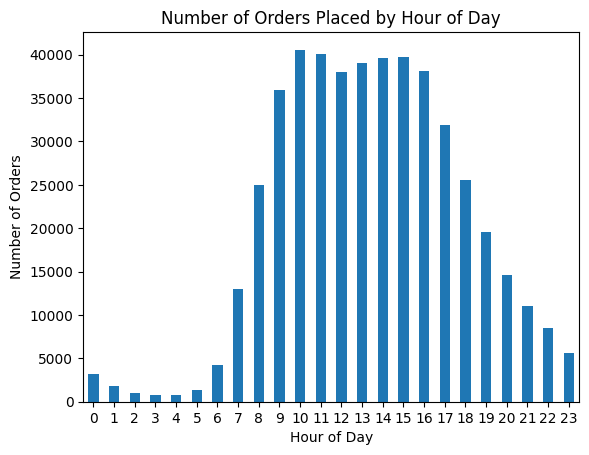

In [33]:
# Looking at the number of orders based on the hour of day
orders_placed_by_hour = orders['order_hour_of_day'].value_counts().sort_index()
print(orders_placed_by_hour)

# Creating a visual representation of the number of order placed by the hour
orders_placed_by_hour.plot(kind='bar',
                           title='Number of Orders Placed by Hour of Day',
                           xlabel = 'Hour of Day',
                           ylabel = 'Number of Orders',
                           rot = 0)
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM - 11:00 AM and 3:00 PM.

### 3. What day of the week do people shop for groceries?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64


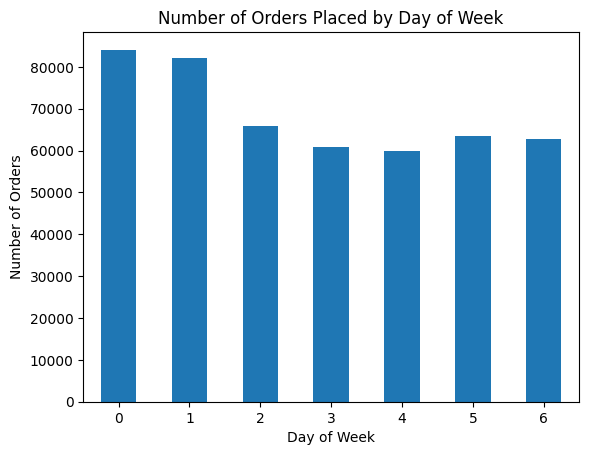

In [35]:
# Looking at the number of orders based on the day of the week
orders_placed_by_dow = orders['order_dow'].value_counts().sort_index()
print(orders_placed_by_dow)

# Creating a visual representation of the number of orders placed by the day of the week
orders_placed_by_dow.plot(kind = 'bar',
                          title = 'Number of Orders Placed by Day of Week',
                          xlabel = 'Day of Week',
                          ylabel = 'Number of Orders',
                          rot = 0)
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### 4. How long do people wait until placing another order?

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: count, dtype: int64


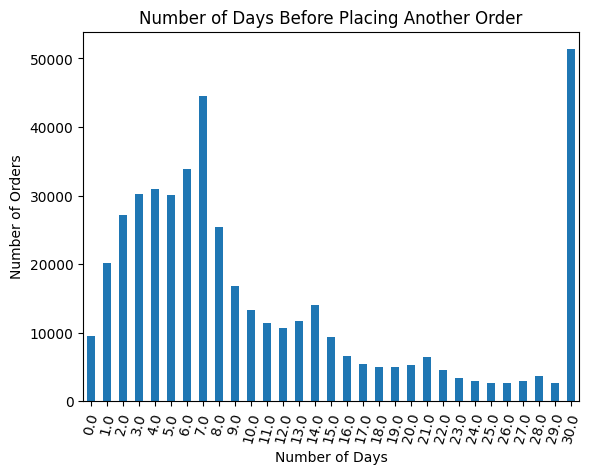

The order frequency shows a notable spike at 7 days (44577 orders).
The average number of days before placing another order is 14520.48.
The median number of days before placing another order is 9589.0.


In [39]:
# Looking at the number of days before someone orders another product
wait_time = orders['days_since_prior_order'].value_counts().sort_index()
print(wait_time)

# Creating a visual representation of the number of days before someone orders another product
wait_time.plot(kind = 'bar',
               title = 'Number of Days Before Placing Another Order',
               xlabel = 'Number of Days',
               ylabel = 'Number of Orders',
               rot = 75)
plt.show()

# Some more analysis
avg_days = wait_time.mean()
median_days = wait_time.median()
print(f"The order frequency shows a notable spike at 7 days ({wait_time[7]} orders).")
print(f"The average number of days before placing another order is {avg_days:.2f}.")
print(f"The median number of days before placing another order is {median_days}.")

The 0 values probably correspond to customers who placed more than one order in the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interstingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

### 5. Is there a difference in **'order_hour_of_day'** distributions on Wednesdays and Saturdays?

In [40]:
# Creating a mask for both of the days
wed_mask = orders['order_dow'] == 3
sat_mask = orders['order_dow'] == 6

# Creating another DataFrame containing only the specified days
wednesday_orders = orders[wed_mask]
saturday_orders = orders[sat_mask]

# Counting only the number of orders based on the hour
wed_order_hours = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
sat_order_hours = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Testing purposes
print(wed_order_hours)
print(sat_order_hours)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64
order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64


In [41]:
# Combining the two days
wed_sat_comparison = pd.concat([wed_order_hours, sat_order_hours], axis = 'columns')
wed_sat_comparison.columns = ['Wednesday', 'Saturday']  # Naming the columns

# Testing Purposes
print(wed_sat_comparison)

                   Wednesday  Saturday
order_hour_of_day                     
0                        373       464
1                        215       254
2                        106       177
3                        101       125
4                        108       118
5                        170       161
6                        643       451
7                       1732      1619
8                       3125      3246
9                       4490      4311
10                      5026      4919
11                      5004      5116
12                      4688      5132
13                      4674      5323
14                      4774      5375
15                      5163      5188
16                      4976      5029
17                      4175      4295
18                      3463      3338
19                      2652      2610
20                      1917      1847
21                      1450      1473
22                      1154      1185
23                       

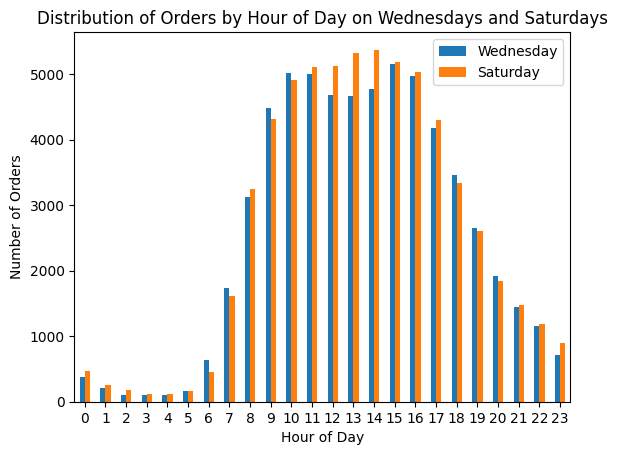

In [42]:
# Creating a barchart
wed_sat_comparison.plot(kind = 'bar',
                        title = 'Distribution of Orders by Hour of Day on Wednesdays and Saturdays',
                        xlabel = 'Hour of Day',
                        ylabel = 'Number of Orders',
                        rot = 0)
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somehwere between 11h and 13h.

### 6. What's the distribution for the number of orders per customer?

In [43]:
# Grouping the data by user_id
orders_placed_by_users = orders.groupby('user_id')['order_id'].count()

# Sorting the results for better readability
sorted_orders_placed_by_users = orders_placed_by_users.sort_values()

# Testing purposes
print(sorted_orders_placed_by_users)

user_id
72650      1
72647      1
72646      1
72640      1
72637      1
          ..
134511    24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


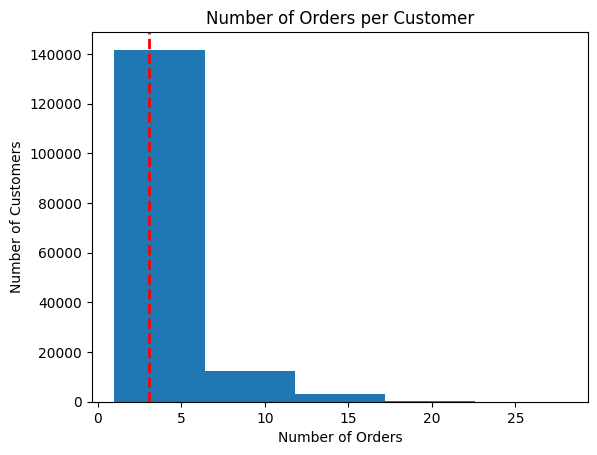

In [49]:
# Creating a histogram to show the distribution
sorted_orders_placed_by_users.plot(kind = 'hist',
                                   bins = 5,
                                   title = 'Number of Orders per Customer',
                                   xlabel = 'Number of Orders',
                                   ylabel = 'Number of Customers')

# Creating a mean line to my histogram
mean_value = sorted_orders_placed_by_users.mean()
plt.axvline(mean_value, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.show()

### 7. What are the top 20 popular products (display their id and name)?

In [50]:
# Merging the datasets on product_id
order_products_and_products = order_products.merge(products, on = 'product_id')

# Grouping by product_id and product_name
product_name_and_product_id = order_products_and_products.groupby(['product_id', 'product_name']).size()
print(product_name_and_product_id)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           280
2           All-Seasons Salt                                                      11
3           Robust Golden Unsweetened Oolong Tea                                  42
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     49
7           Pure Coconut Water With Orange                                         2
                                                                                ... 
49684       Vodka- Triple Distilled- Twist of Vanilla                              1
49685       En Croute Roast Hazelnut Cranberry                                     2
49686       Artisan Baguette                                                      24
49687       Smartblend Healthy Metabolism Dry Cat Food                             1
49688       Fresh Foaming Cleanser                                      

In [52]:
# Sorting the results
sort_products = product_name_and_product_id.sort_values(ascending = False)
print(sort_products)

# Displaying the top 20
top_20 = sort_products.head(20)
print(top_20)

product_id  product_name                                        
24852       Banana                                                  66050
13176       Bag of Organic Bananas                                  53297
21137       Organic Strawberries                                    37039
21903       Organic Baby Spinach                                    33971
47209       Organic Hass Avocado                                    29773
                                                                    ...  
49636       Vegetable & Chicken Dumpling                                1
49631       B-Complex 100 Stress Formula                                1
49657       Cabernet Tomatoes                                           1
49654       Teriyaki Sauce- Sesame- Original                            1
49650       California Style White Hand-Tossed Style Crust Pizza        1
Length: 44516, dtype: int64
product_id  product_name            
24852       Banana                      66050
13176     

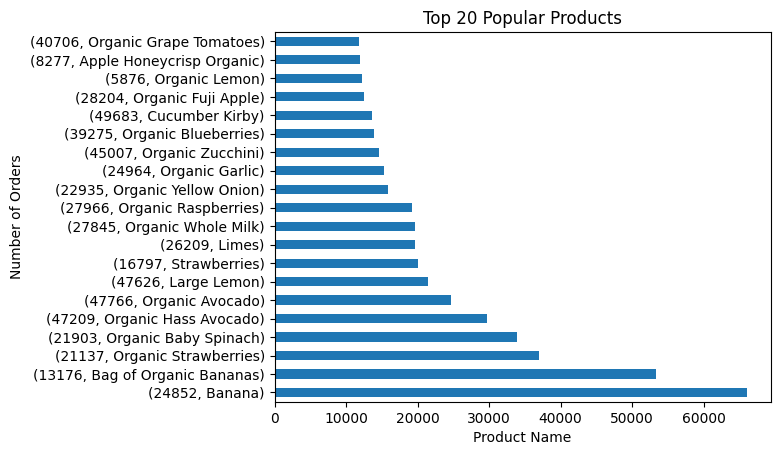

In [58]:
# Horizontal Bar chart
top_20.plot(kind = 'barh',
            title = 'Top 20 Popular Products',
            xlabel = 'Product Name',
            ylabel = 'Number of Orders',
            rot = 0)
plt.show()

The top 20 items are all produce, except for milk. Looks like people want delicious and nutritious!

### 8. How many items do people typically buy in one order? What does the distribution look like?

In [59]:
# Grouping the data and counting
order_and_product_id = order_products.groupby('order_id')['product_id'].count()

# Aggregating the counts and sorting them by index
order_and_product_id_counts = order_and_product_id.value_counts().sort_index()

# Testing purposes
print(order_and_product_id_counts)

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64


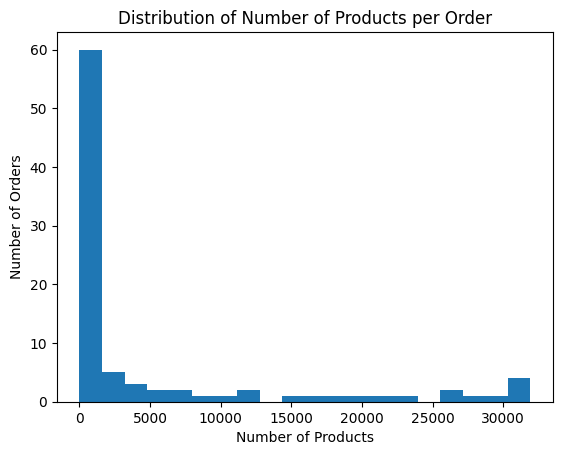

In [85]:
# barchart
order_and_product_id_counts.plot(kind = 'hist',
                                title = 'Distribution of Number of Products per Order',
                                xlabel = 'Number of Products',
                                ylabel = 'Number of Orders',
                                bins = 20,
                                rot = 0)
plt.show()

### 9. What are the top 20 items that are reordered most frequently (display thier names and product IDs)?

In [86]:
# Filtering the data
filtered_order_products = order_products[order_products['reordered'] == 1]
print(filtered_order_products)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [87]:
# Merging the datasets
merge_order_products_and_products = filtered_order_products.merge(products, on = 'product_id')

# Grouping by product_id and product_name
reordered_product_size = merge_order_products_and_products.groupby(['product_id', 'product_name']).size()

# Sorting the result
sorted_reordered_product_size = reordered_product_size.sort_values(ascending = False)

# Displaying the top 20
top_20_reordered_products = sorted_reordered_product_size.head(20)
print(top_20_reordered_products)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64


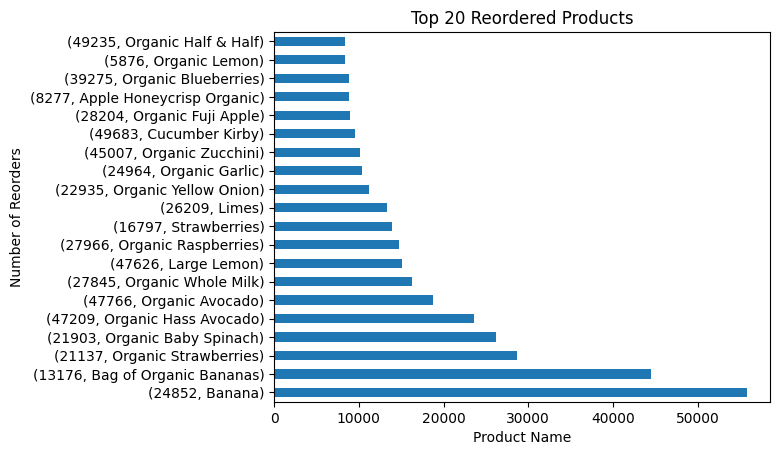

In [88]:
# Barchart
top_20_reordered_products.plot(kind = 'barh',
                               title = 'Top 20 Reordered Products',
                               xlabel = 'Product Name',
                               ylabel = 'Number of Reorders',
                               rot = 0)
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that preishables would be the most reordered items.